In [114]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import re
from sklearn.cross_validation import train_test_split
from textblob import TextBlob
from sklearn import metrics

In [115]:
%matplotlib inline

In [116]:
sms_data = pd.read_csv('SMSSpamCollection', sep='\t', header=None)

In [117]:
sms_data.columns = ["spam", "text"]

In [118]:
sms_data["is_spam"] = sms_data["spam"].map(lambda x: 1 if x == "spam" else 0)

In [119]:
sms_data = sms_data.drop('spam', axis=1)

In [120]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/gordon/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gordon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gordon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/gordon/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/gordon/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/gordon/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [121]:
blob.word_counts

defaultdict(<class 'int'>, {'la': 1, 'only': 1, 'jurong': 1, 'cine': 1, 'great': 1, 'point': 1, 'got': 1, 'wat': 1, 'n': 1, 'bugis': 1, 'e': 1, 'go': 1, 'buffet': 1, 'in': 1, 'world': 1, 'available': 1, 'amore': 1, 'there': 1, 'until': 1, 'crazy': 1})

In [122]:
spam_grouping = sms_data.groupby("is_spam")

In [124]:
sms_data["length"] = sms_data["text"].map(lambda x: len(x))

In [125]:
sms_data.head()

,text,is_spam,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [126]:
sms_data.pivot_table('length','is_spam')

is_spam
0           71.482487
1          138.670683
Name: length, dtype: float64

That's something to work with. Spam is longer by about 2x. On average.

In [127]:
spam_grouping = sms_data.groupby('is_spam')

is_spam
0          [[Axes(0.125,0.125;0.775x0.775)]]
1          [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

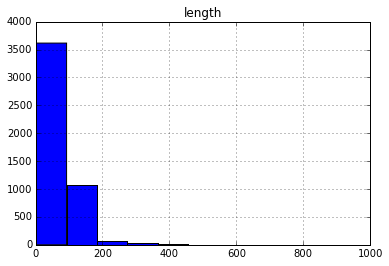

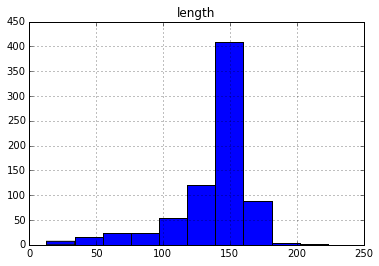

In [128]:
spam_grouping.hist()

Now, these don't have the same scales, but that about shows the difference.

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
vectorizer = CountVectorizer()

In [131]:
vectors = vectorizer.fit_transform(sms_data['text'])

In [132]:
vectors[0]

<1x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [133]:
y_data = sms_data.is_spam.values
x_data = sms_data[['text', 'length']].values

In [134]:
train_x, test_x, train_y, test_y = train_test_split(sms_data[['text', 'length']].values, sms_data['is_spam'].values, test_size=0.3)

In [135]:
train_x

array([[ 'all the lastest from Stereophonics, Marley, Dizzee Racal, Libertines and The Strokes! Win Nookii games with Flirt!! Click TheMob WAP Bookmark or text WAP to 82468',
        162],
       ['Oh ho. Is this the first time u use these type of words', 55],
       [ 'Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry scores with a simple shot from 6 yards from a pass by Bergkamp to give Arsenal a 2 goal margin after 78 mins.',
        155],
       ..., 
       ['I dont thnk its a wrong calling between us', 42],
       [ "Carlos is taking his sweet time as usual so let me know when you and patty are done/want to smoke and I'll tell him to haul ass",
        127],
       [ 'No. 1 Nokia Tone 4 ur mob every week! Just txt NOK to 87021. 1st Tone FREE ! so get txtin now and tell ur friends. 150p/tone. 16 reply HL 4info',
        143]], dtype=object)

In [136]:
train_y

array([1, 0, 1, ..., 0, 0, 1])

In [137]:
train_x_vectors = vectorizer.fit_transform(train_x[:,0])

In [138]:
from sklearn.naive_bayes import BernoulliNB

In [139]:
bernoulli = BernoulliNB()

In [140]:
bernoulli.fit(train_x_vectors, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [141]:
test_x_vectors = vectorizer.transform(test_x[:,0])

In [142]:
y_predictions = bernoulli.predict(test_x_vectors)

In [143]:
print(metrics.f1_score(test_y, y_predictions))

0.906801007557


Oh, read 'em and weep. That's an '0.91'. Either I've done something horribly wrong, or I've done something totally awesome. Thanks sklearn.